In [ ]:
from nsepy import get_history
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
start = datetime(2019,1,1)
end = datetime(2020,7,31)

stock = get_history(symbol='RELIANCE',start=start,end=end)

STPC = pd.DataFrame({"P_Close": stock["Prev Close"]})

STPC.plot()

In [27]:
print (STPC.head())

            P_Close
Date               
2018-04-02   882.70
2018-04-03   892.95
2018-04-04   899.55
2018-04-05   894.90
2018-04-06   908.20


In [50]:
short_MA = 30
long_MA = 100

# Create a table 'signals' with the `signal` column
signals = pd.DataFrame(index=STPC.index)
signals['signal'] = 0.0

# Compute short simple moving average 
signals['short_mavg'] = STPC['P_Close'].rolling(window=short_MA, min_periods=1, center=False).mean()

# Compute long simple moving average 
signals['long_mavg'] = STPC['P_Close'].rolling(window=long_MA, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_MA:] = np.where(signals['short_mavg'][short_MA:] 
                                            > signals['long_mavg'][short_MA:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals.tail(10))

            signal   short_mavg  long_mavg  positions
Date                                                 
2020-03-18     0.0  1347.215000  1467.4840        0.0
2020-03-19     0.0  1333.315000  1462.8570        0.0
2020-03-20     0.0  1316.358333  1457.6915        0.0
2020-03-23     0.0  1302.006667  1453.2005        0.0
2020-03-24     0.0  1282.881667  1447.2500        0.0
2020-03-25     0.0  1266.540000  1442.0405        0.0
2020-03-26     0.0  1254.761667  1438.2940        0.0
2020-03-27     0.0  1241.876667  1434.3795        0.0
2020-03-30     0.0  1228.386667  1430.5625        0.0
2020-03-31     0.0  1213.596667  1426.5180        0.0


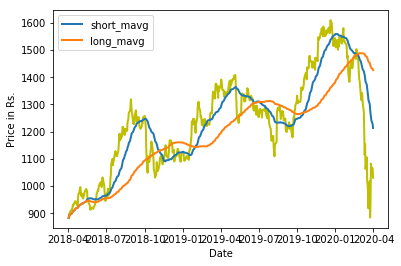

In [51]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in Rs.')

# Plot the closing price
STPC['P_Close'].plot(ax=ax1, color='y', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
         
# Show the plot
plt.show()

In [12]:
signals.to_csv("signals.csv", index=True, encoding='utf8')

In [54]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a table `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['STPC'] = 200*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(STPC['P_Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(STPC['P_Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(STPC['P_Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.tail())

            STPC  holdings      cash     total  returns
Date                                                   
2020-03-25   0.0       0.0  155190.0  155190.0      0.0
2020-03-26   0.0       0.0  155190.0  155190.0      0.0
2020-03-27   0.0       0.0  155190.0  155190.0      0.0
2020-03-30   0.0       0.0  155190.0  155190.0      0.0
2020-03-31   0.0       0.0  155190.0  155190.0      0.0


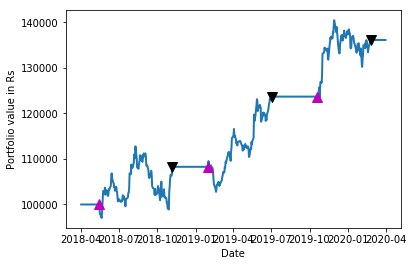

In [53]:
# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in Rs')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [37]:
print(portfolio.tail())

            SBIN  holdings      cash     total  returns
Date                                                   
2020-03-25   0.0       0.0  110670.0  110670.0      0.0
2020-03-26   0.0       0.0  110670.0  110670.0      0.0
2020-03-27   0.0       0.0  110670.0  110670.0      0.0
2020-03-30   0.0       0.0  110670.0  110670.0      0.0
2020-03-31   0.0       0.0  110670.0  110670.0      0.0


In [15]:
print(pos_diff.tail())

            SBIN
Date            
2019-02-25   0.0
2019-02-26   0.0
2019-02-27   0.0
2019-02-28   0.0
2019-03-01   0.0
